#Cali House Price Prediction 


In [73]:
#importing dependencies
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sna #used for plotting 
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split


importing dataset 


In [74]:
d=sklearn.datasets.fetch_california_housing()
print(d)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [75]:
#we need to make this data more structured and hence we use pandas
df=pd.DataFrame(d.data,columns=d.feature_names)#here the data is to import only the data array from the dataset
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [76]:
#here we can see the last column==>targate column was not added and hence we need to add that to our dataset
df["price"]=d.target#or d["target"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [78]:
df.shape

(20640, 9)

In [79]:
df.isnull().sum() # to check if there are any null values in the df

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [80]:
#stat mearures of the df
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#We need to understand the correlation between the columns=>+ve or -ve correlation

<Axes: >

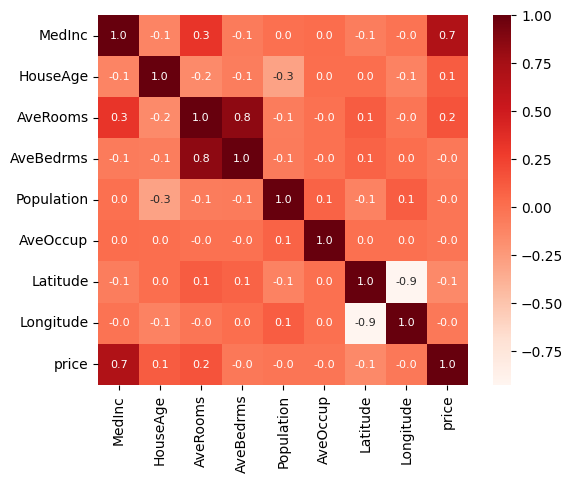

In [81]:
cor=df.corr()
#we need to plot this to understand the data... for this we use a heat map
sna.heatmap(cor,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Reds")
#cbar is to get the colout bar on the side
#square is to get the values written in the square
#fmt is the format of the floating points here it is .1 to denote the we need only 1 value after decimal point
#annot is for getting the column names of the side
#annot_kws is to mention the size of the text on the plot
#cmap is for the colour of the map

splitting the price and the data

In [82]:
X=df.drop("price",axis=1)
Y=df["price"]

In [83]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [84]:
Y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [85]:
trainx,testx,trainy,testy=train_test_split(X,Y,test_size=0.2,random_state=2)

#Model Training

xgboost regressor--- decision tree on symbol model

In [86]:
model=XGBRegressor()

In [87]:
model.fit(trainx,trainy)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#Prediction
we cant use accuracy sore in regression models since we are not classifying we r predicting a price

Thus to evaluate in these cases we use r squared error and mean squared error

In [88]:
train_predict=model.predict(trainx)
train_predict

array([0.6893792 , 2.986824  , 0.48874274, ..., 1.8632544 , 1.7800125 ,
       0.7565893 ], dtype=float32)

In [89]:
#rsquared error----- this value should be close to 0--- lesser the value more accurate it is
score1_train=metrics.r2_score(trainy,train_predict)
print(" R Squared Error is: ",score1_train)

#Mean Absolute value
score2_train=metrics.mean_absolute_error(trainy,train_predict)
print(" Mean Absolute Error is: ",score2_train)

 R Squared Error is:  0.9451221492760822
 Mean Absolute Error is:  0.1919170860794262


In [91]:
#Now on test data
#rsquared error----- this value should be close to 0--- lesser the value more accurate it is
test_predict=model.predict(testx)
print("predictions: ", test_predict)

score1_test=metrics.r2_score(testy,test_predict)
print(" R Squared Error is: ",score1_test)

#Mean Absolute value
score2_test=metrics.mean_absolute_error(testy,test_predict)
print(" Mean Absolute Error is: ",score2_test)

predictions:  [2.787383  1.9628428 0.782536  ... 1.5060123 0.8763797 1.9317917]
 R Squared Error is:  0.8412904408180302
 Mean Absolute Error is:  0.30753655785801337


## Visualize the actaul and the predicted prices

In [97]:
from importlib import reload
plt=reload(plt)

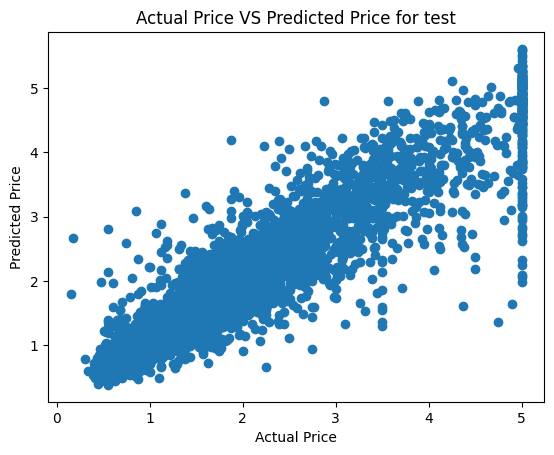

In [100]:
plt.scatter(testy,test_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price for test")
plt.show()

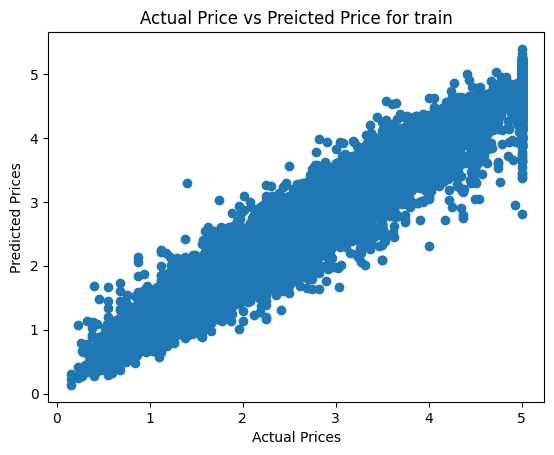

In [101]:
plt.scatter(trainy, train_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price for train")
plt.show()